In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from collections import defaultdict

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from collections import Counter
from collections import defaultdict

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
%matplotlib inline
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import cross_val_predict
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [2]:

X_train = pd.read_csv("./X_trainc.csv",skipinitialspace=True)
X_test = pd.read_csv("./X_testc.csv",skipinitialspace=True)

In [13]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1",...,fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)",Activity,ActivityName,subject
0,0.288585,-0.020294,-0.132905,-0.995279,-0.407747,-0.602122,0.929294,0.359910,-0.058526,0.256892,...,-1.000000,-0.074323,-0.298676,-0.112754,0.030400,-0.464761,-0.018446,5,STANDING,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.714892,-0.570979,0.611627,0.284213,0.284595,0.115705,...,-1.000000,0.158075,-0.595051,0.053477,-0.007435,-0.732626,0.703511,5,STANDING,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.592235,-0.570979,0.273025,0.337202,-0.164739,0.017150,...,-0.555556,0.414503,-0.390748,-0.118559,0.177899,0.100699,0.808529,5,STANDING,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.627446,-0.911872,0.061436,0.198204,-0.264307,0.072545,...,-0.936508,0.404573,-0.117290,-0.036788,-0.012892,0.640011,-0.485366,5,STANDING,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.786553,-0.761434,0.313276,0.191161,0.086904,0.257615,...,-0.936508,0.087753,-0.351471,0.123320,0.122542,0.693578,-0.615971,5,STANDING,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.195643,-0.082077,-0.561607,-0.078255,-0.056751,-0.094106,...,-0.904762,-0.070157,-0.588433,-0.190437,0.829718,0.206972,-0.425619,2,WALKING_UPSTAIRS,30
7348,0.273853,-0.007749,-0.147468,-0.235309,0.178138,-0.051532,-0.361660,0.206839,-0.154722,0.032725,...,-0.904762,0.165259,-0.390738,0.064907,0.875679,-0.879033,0.400219,2,WALKING_UPSTAIRS,30
7349,0.273387,-0.017011,-0.045022,-0.218218,0.173131,0.152003,-0.376773,0.063584,-0.017019,-0.004323,...,-0.904762,0.195034,0.025145,0.052806,-0.266724,0.864404,0.701169,2,WALKING_UPSTAIRS,30
7350,0.289654,-0.018843,-0.158281,-0.219139,0.160333,0.021678,-0.475165,0.009588,-0.038354,-0.277801,...,-0.904762,0.013865,0.063907,-0.101360,0.700740,0.936674,-0.589479,2,WALKING_UPSTAIRS,30


In [3]:
y_train = pd.read_csv('y_train.txt', names=['Activity'], squeeze=True)
y_test = pd.read_csv('y_test.txt', names=['Activity'], squeeze=True)
class_mapping = {'WALKING':1,'WALKING_UPSTAIRS':2,'WALKING_DOWNSTAIRS':3,
                       'SITTING':4, 'STANDING':5,'LAYING':6}

In [10]:
y_train

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [4]:
X_train = X_train.drop(['Activity', 'ActivityName', 'subject'], axis = 1).values
y_train = np.array(y_train)

X_test = X_test.drop(['Activity', 'ActivityName', 'subject'], axis = 1).values
y_test = np.array(y_test)

In [24]:
base_estimator =  Pipeline([('model', SVC())])
#print("Parameters of the pipeline: ", base_estimator.get_params().keys())
param_grid = {'model__C': [1, 0.1, 0.01, 0.15, 0.001],
 'model__gamma': ['auto', 'scale'],
 'model__kernel': ['linear','rbf', 'poly','sigmoid'],
 'model__tol':[1e-4, 1e-5,1e-6,1e-3,1e-2],
 'model__class_weight': [None, 'balanced']
 }


sh = GridSearchCV(base_estimator, param_grid, n_jobs=-1, cv=5, refit='f1_macro',scoring=['precision_macro', 'recall_macro', 'f1_macro']).fit(X_train, y_train)
df = pd.DataFrame(sh.cv_results_)
display(df.sort_values(by='rank_test_f1_macro')[['rank_test_f1_macro','param_model__C','param_model__gamma','param_model__kernel','param_model__class_weight', 'param_model__tol','mean_test_f1_macro']].set_index('rank_test_f1_macro'))

#print(df.sort_values(by='rank_test_f1_macro')[['rank_test_f1_macro','param_model__C', 'param_model__class_weight','param_model__gamma','param_model__kernel','mean_test_f1_macro']].set_index('rank_test_f1_macro')[:1].to_latex())

y_pred = sh.best_estimator_.predict(X_train)
print("Train (w/o scaling)\n---")
print("F1 {:.3f}".format(f1_score(y_train, y_pred, average='macro')))
print("Precision {:.3f}".format(precision_score(y_train, y_pred, average='macro')))
print("Recall {:.3f}".format(recall_score(y_train, y_pred, average='macro')))

y_pred = sh.best_estimator_.predict(X_test)
print("Test (w/o scaling)\n---")
print("F1 {:.3f}".format(f1_score(y_test, y_pred, average='macro')))
print("Precision {:.3f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall {:.3f}".format(recall_score(y_test, y_pred, average='macro')))

,param_model__C,param_model__gamma,param_model__kernel,param_model__class_weight,param_model__tol,mean_test_f1_macro
rank_test_f1_macro,,,,,,
1,1,scale,poly,balanced,0.001,0.934078
2,1,scale,poly,balanced,0.00001,0.933952
2,1,scale,poly,balanced,0.0001,0.933952
2,1,scale,poly,balanced,0.000001,0.933952
5,1,scale,poly,balanced,0.01,0.933803
...,...,...,...,...,...,...
376,0.001,auto,rbf,balanced,0.01,0.044359
376,0.001,auto,rbf,balanced,0.001,0.044359
376,0.001,auto,rbf,balanced,0.000001,0.044359


Train (w/o scaling)
---
F1 0.993
Precision 0.993
Recall 0.993
Test (w/o scaling)
---
F1 0.950
Precision 0.952
Recall 0.950


1	scale	poly	balanced	0.001	0.934078

#  SVM Without RFE and without any modifications 

In [38]:
clf = SVC(gamma='scale', C=1, kernel='poly', class_weight='balanced', tol  = 0.001, degree = 4)
clf.fit(X_train, y_train.ravel())

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9524940617577197
F1-score_macro: 0.9518452125075582
Classification Report:
              precision    recall  f1-score   support

           1       0.93      1.00      0.96       496
           2       0.96      0.91      0.93       471
           3       0.96      0.95      0.96       420
           4       0.94      0.91      0.92       491
           5       0.92      0.94      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



### WITH TomekLinks

In [5]:
tom = TomekLinks()
X_train_tom, y_train_tom = tom.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_tom))

Resampled dataset shape Counter({6: 1407, 5: 1363, 4: 1275, 1: 1225, 2: 1072, 3: 986})


In [13]:
clf = SVC(gamma='scale', C=1, kernel='poly', class_weight='balanced', tol  = 0.001, degree = 4,probability=True)
clf.fit(X_train_tom, y_train_tom.ravel())

y_pred_tom = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tom)
f1_scores = f1_score(y_test, y_pred_tom, average='macro')
classification_rep = classification_report(y_test, y_pred_tom, target_names=class_mapping, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9535120461486257
F1-score_macro: 0.9528309620730314
Classification Report:
                    precision    recall  f1-score   support

           WALKING      0.932     0.998     0.964       496
  WALKING_UPSTAIRS      0.962     0.907     0.933       471
WALKING_DOWNSTAIRS      0.964     0.955     0.959       420
           SITTING      0.941     0.910     0.925       491
          STANDING      0.926     0.945     0.936       532
            LAYING      0.998     1.000     0.999       537

          accuracy                          0.954      2947
         macro avg      0.954     0.953     0.953      2947
      weighted avg      0.954     0.954     0.953      2947



### WITH SMOTE

In [40]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sm))

Resampled dataset shape Counter({5: 1407, 4: 1407, 6: 1407, 1: 1407, 3: 1407, 2: 1407})


In [9]:
clf = SVC(gamma='scale', C=1, kernel='poly', class_weight='balanced', tol  = 0.001, degree = 4)
clf.fit(X_train_sm, y_train_sm.ravel())

y_pred_sm = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_sm)
f1_scores = f1_score(y_test, y_pred_sm, average='macro')
classification_rep = classification_report(y_test, y_pred, target_names=class_mapping)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

NameError: name 'X_train_sm' is not defined

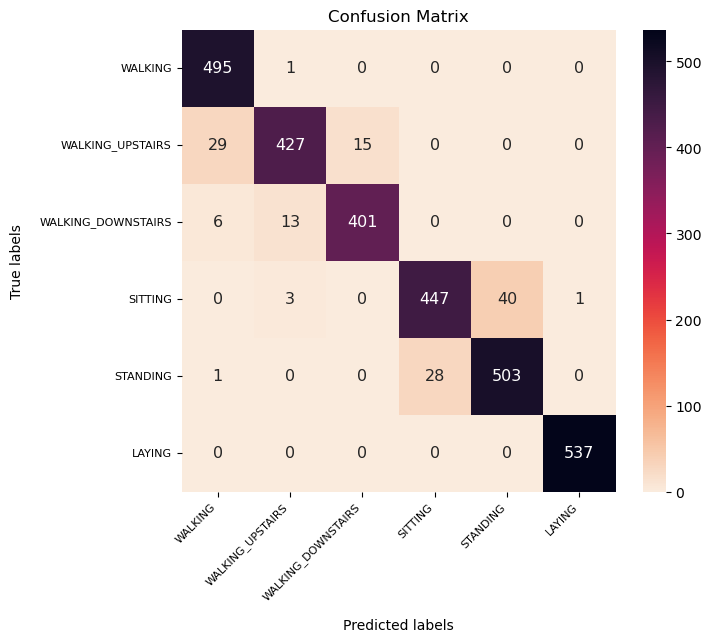

                    precision    recall  f1-score   support

           WALKING       0.93      1.00      0.96       496
  WALKING_UPSTAIRS       0.96      0.91      0.93       471
WALKING_DOWNSTAIRS       0.96      0.95      0.96       420
           SITTING       0.94      0.91      0.93       491
          STANDING       0.93      0.95      0.94       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Predict using the best model
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test.ravel(), y_pred_tom)

# Define the inverse class mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}

# Define the class labels from unique values in y_test and y_pred
class_labels = np.unique(np.concatenate((y_test, y_pred_tom)))

# Define the class names using inv_class_mapping and class_labels
class_names = [inv_class_mapping[label] for label in class_labels]

# Set a more contrasting color scheme
cmap = sns.color_palette('rocket_r', as_cmap=True)

# Plot the confusion matrix
plt.figure(figsize=(7, 6))
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, xticklabels=class_names, yticklabels=class_names, cmap=cmap, annot_kws={"fontsize": 11.5})

# Set x-axis label distance
ax.xaxis.labelpad = 11

# Set y-axis label distance
ax.yaxis.labelpad = 11

# Set tick label font size and distance for class names
ax.set_xticklabels(class_names, fontsize=8, rotation=45, ha='right')
ax.set_yticklabels(class_names, fontsize=8)

# Set labels and title
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

# Print the classification report
classification_rep = classification_report(y_test.ravel(), y_pred, target_names=class_names)
print(classification_rep)


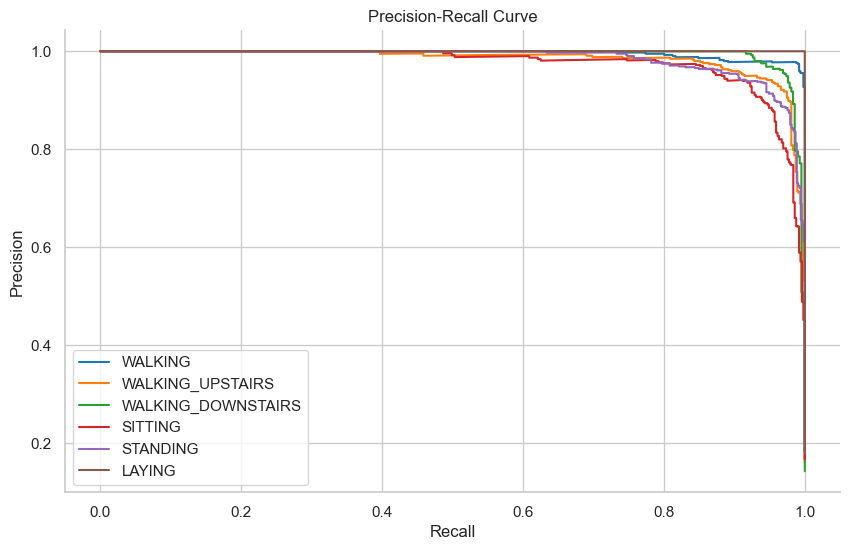

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

# Set a seaborn style
sns.set(style="whitegrid")

# Predict probabilities
y_scores = clf.predict_proba(X_test)

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Define your class mapping
class_mapping = {'WALKING': 1, 'WALKING_UPSTAIRS': 2, 'WALKING_DOWNSTAIRS': 3,
                 'SITTING': 4, 'STANDING': 5, 'LAYING': 6}

# Define clear colors for each class
class_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plotting precision-recall curves
plt.figure(figsize=(10, 6))
for class_idx, class_name in class_mapping.items():
    class_label = list(class_mapping.keys()).index(class_idx)  # Convert class index to label
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, class_label], y_scores[:, class_label])
    plt.plot(recall, precision, color=class_colors[class_label], label=class_idx)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
sns.despine()
plt.show()


USING RFE 

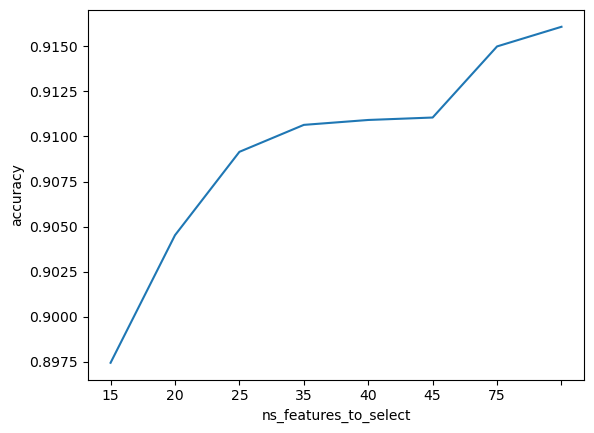

In [21]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score


ns_features_to_select = [15,20, 25, 35, 40, 45, 75, None]
scores = list()
for n_features in ns_features_to_select:
    dt = RFE(RandomForestClassifier(random_state = 42, n_jobs = -1, max_depth = 9),n_features_to_select=n_features)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(ns_features_to_select)), ns_features_to_select)
plt.xlabel("ns_features_to_select")
plt.ylabel("accuracy")
plt.show()

In [27]:

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

sel = RFE(DecisionTreeClassifier(random_state = 43), n_features_to_select=40)
X_train_sel = sel.fit_transform(X_train, y_train)



X_test_sel = sel.transform(X_test) 

X_train_sel.shape , X_test_sel.shape

((7352, 40), (2947, 40))

In [42]:
clf_40 = SVC(gamma='scale', C=1, kernel='poly', class_weight='balanced', tol  = 0.001)
clf_40.fit(X_train_sel, y_train.ravel())

y_pred = clf_40.predict(X_test_sel)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9406175771971497
F1-score_macro: 0.9401084817558091
Classification Report:
              precision    recall  f1-score   support

           1      0.891     0.984     0.935       496
           2      0.947     0.877     0.911       471
           3      0.973     0.948     0.960       420
           4      0.925     0.902     0.913       491
           5      0.916     0.927     0.921       532
           6      1.000     1.000     1.000       537

    accuracy                          0.941      2947
   macro avg      0.942     0.940     0.940      2947
weighted avg      0.942     0.941     0.940      2947



In [52]:
base_estimator =  Pipeline([('model', SVC())])
#print("Parameters of the pipeline: ", base_estimator.get_params().keys())
param_grid = {'model__C': [1, 0.1, 0.01, 0.001],
 'model__gamma': ['auto', 'scale'],
 'model__kernel': ['linear','rbf', 'poly','sigmoid'],
 'model__tol':[1e-4, 1e-5,1e-6,1e-3,1e-2],
 'model__class_weight': [None, 'balanced']
 }


sh = GridSearchCV(base_estimator, param_grid, n_jobs=-1, cv=5, refit='f1_macro',scoring=['precision_macro', 'recall_macro', 'f1_macro']).fit(X_train_sel, y_train)
df = pd.DataFrame(sh.cv_results_)
display(df.sort_values(by='rank_test_f1_macro')[['rank_test_f1_macro','param_model__C','param_model__gamma','param_model__kernel','param_model__class_weight', 'param_model__tol','mean_test_f1_macro']].set_index('rank_test_f1_macro'))

#print(df.sort_values(by='rank_test_f1_macro')[['rank_test_f1_macro','param_model__C', 'param_model__class_weight','param_model__gamma','param_model__kernel','mean_test_f1_macro']].set_index('rank_test_f1_macro')[:1].to_latex())

y_pred = sh.best_estimator_.predict(X_train_sel)
print("Train (w/o scaling)\n---")
print("F1 {:.3f}".format(f1_score(y_train, y_pred, average='macro')))
print("Precision {:.3f}".format(precision_score(y_train, y_pred, average='macro')))
print("Recall {:.3f}".format(recall_score(y_train, y_pred, average='macro')))

y_pred = sh.best_estimator_.predict(X_test_sel)
print("Test (w/o scaling)\n---")
print("F1 {:.3f}".format(f1_score(y_test, y_pred, average='macro')))
print("Precision {:.3f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall {:.3f}".format(recall_score(y_test, y_pred, average='macro')))

,param_model__C,param_model__gamma,param_model__kernel,param_model__class_weight,param_model__tol,mean_test_f1_macro
rank_test_f1_macro,,,,,,
1,1,scale,rbf,balanced,0.01,0.932711
1,1,scale,rbf,balanced,0.001,0.932711
1,1,scale,rbf,balanced,0.000001,0.932711
1,1,scale,rbf,balanced,0.00001,0.932711
1,1,scale,rbf,balanced,0.0001,0.932711
...,...,...,...,...,...,...
301,0.001,auto,poly,balanced,0.01,0.044359
301,0.001,auto,sigmoid,balanced,0.00001,0.044359
301,0.001,auto,sigmoid,balanced,0.000001,0.044359


Train (w/o scaling)
---
F1 0.982
Precision 0.982
Recall 0.982
Test (w/o scaling)
---
F1 0.944
Precision 0.945
Recall 0.944


1	scale	rbf	balanced	tol = 0.0001	

# RFE 40 WITHOUT TOM

In [53]:
clf_40 = SVC(gamma='scale', C=1, kernel='rbf', class_weight='balanced', tol  = 0.01)
clf_40.fit(X_train_sel, y_train.ravel())

y_pred = clf_40.predict(X_test_sel)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9443501866304717
F1-score_macro: 0.9443507071074162
Classification Report:
              precision    recall  f1-score   support

           1      0.931     0.974     0.952       496
           2      0.949     0.915     0.932       471
           3      0.974     0.964     0.969       420
           4      0.914     0.890     0.902       491
           5      0.902     0.921     0.912       532
           6      1.000     1.000     1.000       537

    accuracy                          0.944      2947
   macro avg      0.945     0.944     0.944      2947
weighted avg      0.945     0.944     0.944      2947



In [55]:
base_estimator =  Pipeline([('model', SVC(gamma='scale', C=1, kernel='poly', class_weight='balanced', tol  = 0.01))])
#print("Parameters of the pipeline: ", base_estimator.get_params().keys())
param_grid = {'model__degree': [0,1,2,3,4,5,6,7],
 }


sh = GridSearchCV(base_estimator, param_grid, n_jobs=-1, cv=5, refit='f1_macro',scoring=['precision_macro', 'recall_macro', 'f1_macro']).fit(X_train, y_train)
df = pd.DataFrame(sh.cv_results_)
display(df.sort_values(by='rank_test_f1_macro')[['rank_test_f1_macro','param_model__degree','mean_test_f1_macro']].set_index('rank_test_f1_macro'))

#print(df.sort_values(by='rank_test_f1_macro')[['rank_test_f1_macro','param_model__C', 'param_model__class_weight','param_model__gamma','param_model__kernel','mean_test_f1_macro']].set_index('rank_test_f1_macro')[:1].to_latex())

y_pred = sh.best_estimator_.predict(X_train)
print("Train (w/o scaling)\n---")
print("F1 {:.3f}".format(f1_score(y_train, y_pred, average='macro')))
print("Precision {:.3f}".format(precision_score(y_train, y_pred, average='macro')))
print("Recall {:.3f}".format(recall_score(y_train, y_pred, average='macro')))

y_pred = sh.best_estimator_.predict(X_test)
print("Test (w/o scaling)\n---")
print("F1 {:.3f}".format(f1_score(y_test, y_pred, average='macro')))
print("Precision {:.3f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall {:.3f}".format(recall_score(y_test, y_pred, average='macro')))

,param_model__degree,mean_test_f1_macro
rank_test_f1_macro,,
1,4,0.936799
2,5,0.936703
3,6,0.935496
4,3,0.933803
5,7,0.931243
6,2,0.930414
7,1,0.923731
8,0,0.048832


Train (w/o scaling)
---
F1 0.996
Precision 0.996
Recall 0.996
Test (w/o scaling)
---
F1 0.952
Precision 0.953
Recall 0.952


## RFE 40 WITH TOM

In [46]:
tom = TomekLinks()
X_train_sel_tom, y_train_sel_tom = tom.fit_resample(X_train_sel, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sel_tom))

Resampled dataset shape Counter({6: 1407, 5: 1356, 4: 1268, 1: 1226, 2: 1070, 3: 986})


In [58]:
clf_40 = SVC(gamma='scale', C=1, kernel='rbf', class_weight='balanced', tol  = 0.01)
clf_40.fit(X_train_sel_tom, y_train_sel_tom.ravel())

y_pred = clf_40.predict(X_test_sel)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9440108585001696
F1-score_macro: 0.9439336400217159
Classification Report:
              precision    recall  f1-score   support

           1      0.931     0.974     0.952       496
           2      0.945     0.915     0.930       471
           3      0.973     0.960     0.966       420
           4      0.914     0.892     0.903       491
           5      0.904     0.921     0.912       532
           6      1.000     1.000     1.000       537

    accuracy                          0.944      2947
   macro avg      0.945     0.944     0.944      2947
weighted avg      0.944     0.944     0.944      2947



In [50]:
sm = SMOTE()
X_train_sel_sm, y_train_sel_sm = sm.fit_resample(X_train_sel, y_train)
print('Resampled dataset shape %s' % Counter(y_train_sel_sm))

Resampled dataset shape Counter({5: 1407, 4: 1407, 6: 1407, 1: 1407, 3: 1407, 2: 1407})


In [59]:
clf_40_sm = SVC(gamma='scale', C=1, kernel='rbf', class_weight='balanced', tol  = 0.01)
clf_40_sm.fit(X_train_sel_sm, y_train_sel_sm.ravel())

y_pred = clf_40_sm.predict(X_test_sel)

accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred, digits = 3)

print('Accuracy:', accuracy)
print('F1-score_macro:', f1_scores)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9406175771971497
F1-score_macro: 0.9404616619255394
Classification Report:
              precision    recall  f1-score   support

           1      0.922     0.974     0.947       496
           2      0.945     0.907     0.925       471
           3      0.971     0.955     0.963       420
           4      0.912     0.886     0.899       491
           5      0.899     0.919     0.909       532
           6      1.000     1.000     1.000       537

    accuracy                          0.941      2947
   macro avg      0.941     0.940     0.940      2947
weighted avg      0.941     0.941     0.941      2947

